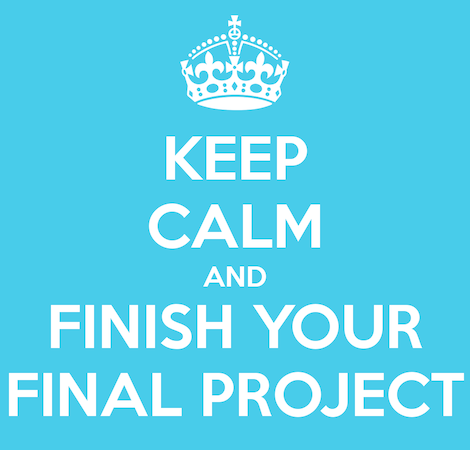

# Overview

<p style="line-height:1.75;font-size:16px">
It's time to put your skills to the test and take on a real-world data science project. You are given a dataset of ad impressions for Android users for a particular ad. Each line represents one impression for that ad and includes details such as timestamp, device, mobile carrier and more.

In [77]:
import pandas as pd

data = pd.read_csv('data/android_bids_us.csv')
data.head()

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click
0,87b0108c-6e9f-4783-8b80-8dd5aa3529a8,1536444331894,com.OppanaGames.CarSim,TX,AT&T Wireless,NaN,NaN,7.0,720,1280,chartboost,0
1,9284441f-a6ea-4698-9017-86436b92d416,1536444363932,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,NaN,NaN,7.0,1280,720,chartboost,0
2,7e4779c2-f757-4324-8c2a-138b558b5a54,1536444386908,com.kuttigames.tenkyurollball,LA,AT&T Wireless,NaN,NaN,7.1.1,720,1280,chartboost,0
3,b64ea208-38ca-42ac-895e-0842d7352cc3,1536444405023,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,NaN,NaN,6.0.1,720,1280,chartboost,0
4,fd0c07cb-31f6-408c-9315-1cb652e76abc,1536444443458,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,NaN,NaN,7.1.1,1024,768,chartboost,0


<p style="line-height:1.75;font-size:16px">
Your task is to predict if a user will click or not on the ad.

# Guidelines

<p style="line-height:1.75;font-size:16px">
You will have two weeks to complete this project during which we will have two half-days dedicated to this. Besides giving you the chance to gain experience and showcase what you've learned, this project is intended to give you a glimpse into the actual process and work of a data scientist.<br> Before we talk about the task itself, here are some important guidelines:<br>
1\. <b>Show your work</b> - if you've tried something and it didn't work that's fine, don't delete it. Data science is an iterative process and we can learn a lot from what didn't work. Explain what didn't work and the reasons for it.<br>
2\. <b>Explain your work</b> - don't just write a bunch of code and the final output. Explain the motivation for each step you take, describe the results you got and what they mean. <br>
3\. <b>Use visualizations</b> - while exploring the data or when trying to convey an important message, use plots to help you. That being said, don't force yourself to add plots if they're not really needed.<br>
4\. <b>Plan ahead</b> - if you start working on the project near the submission date you will have less time to ask questions and come up with ideas.<br>
5\. <b>Google is your friend</b> - while we've learned the basic skills required to complete this project, there are many other techniques and ideas we didn't have time to talk about. Don't limit yourself to the lessons, search for similar problems and how to approach them, exchange ideas with colleagues and don't be afraid to try new ideas. <br>
6\. <b>It's not about the score</b> - while reaching a good prediction score is nice, it's not the main purpose of this project. Use this project to show your understanding and reasoning as well as your technical skills.<br>
7\. <b>Write clean code</b> - make sure you write code that is easy to read and understand. Give meaningful names, use functions, add comments if needed.<br>
8\. <b>Test before submission</b> - your work should be submitted as a Jupyter Notebook. Before submitting it, make sure you run it from start to finish and verify that there are no errors.<br>
9\. <b>Enjoy it</b> - try to have fun working on this, be curious, look for interesting insights and take pride in completing a real-world project end-to-end.

# Tips

<p style="line-height:1.75;font-size:16px">
1\. Since the data is time sensitive, split it so that the test data will be the last month of data and the training data will be anything that came before that.<br>
2\. `play_apps.zip` is data from Google Play about the various apps in the dataset. You can use this to augment the impressions dataset.<br>
3\. The data is collected from customers in the US (multiple timezones).<br>

In [2]:
from zipfile import ZipFile
import pickle

app_details = ZipFile("data/play_apps.zip")
app_file = 'play_apps/a008.com.fc2.blog.androidkaihatu.datecamera2'
app = pickle.loads(app_details.read(app_file))
app

{'title': 'DateCamera2 (Auto timestamp)',
 'icon': 'https://lh3.googleusercontent.com/BvVD8_9aN_-wrqP7WTeF4u40MocWdbNoxxlU_HR1GnRT9SGxZmV3JEQbjCaRVj5880e3',
 'screenshots': ['https://lh3.googleusercontent.com/_CJBocPzM9CF2CPrnnvbEX5-9NllpY2AsqB9e8hyoDDwUIC_dv95Q7dehq8Tu7KKX1c=w720-h310-rw',
  'https://lh3.googleusercontent.com/zQUynoLG5VJd2dV4leUNCvqehyDMVbBVEiqWdKpL35CqkbxDsatCeGOuEviAGTEvHMI=w720-h310-rw',
  'https://lh3.googleusercontent.com/u7Yg9yiCLx9Jou2CqfUr0I1w1I08km_n0I-VCC7Tc8IE-lmqUtHfCemPChNnaO5n6dk=w720-h310-rw',
  'https://lh3.googleusercontent.com/KPcyVSjtX3dvVy8WP2G67U8G8xK2IQHhqWa0nnlPevCr-BaQm31t46StfEs96UTFtZBt=w720-h310-rw',
  'https://lh3.googleusercontent.com/dgUVp1C2nbIcj5XOKLGidzPkvBmWKwXzCxwuHwhhMkn7s8rve6gF-NkTHuuInr0GBA=w720-h310-rw',
  'https://lh3.googleusercontent.com/M0YDP301kQu6WsQxt9fZfsxGRumFrWZnTyPGNlcjeWDbLufl5CC4vDm1Z5F9SUiCR8I=w720-h310-rw',
  'https://lh3.googleusercontent.com/nWRsvYhsHsdmP3W7YC9L9J-vA8prbPIbWVi7mERMU_0jzI_92lU7mYd6gCajORcHBw=w720

<p style="line-height:1.75;font-size:16px">
Before any action, lets split the to train-test by date.<br>
To do that we should encode 'utc_time' as local time by 'user_state'. <br>
We can use 'us' library to convert 'state code' up to 'time zone':

In [3]:
#!python -m pip install us

In [78]:
import us

data['time_zone'] = data["user_state"].apply(lambda state: us.states.lookup(state).time_zones[0])
data.head()

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click,time_zone
0,87b0108c-6e9f-4783-8b80-8dd5aa3529a8,1536444331894,com.OppanaGames.CarSim,TX,AT&T Wireless,NaN,NaN,7.0,720,1280,chartboost,0,America/Chicago
1,9284441f-a6ea-4698-9017-86436b92d416,1536444363932,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,NaN,NaN,7.0,1280,720,chartboost,0,America/Chicago
2,7e4779c2-f757-4324-8c2a-138b558b5a54,1536444386908,com.kuttigames.tenkyurollball,LA,AT&T Wireless,NaN,NaN,7.1.1,720,1280,chartboost,0,America/Chicago
3,b64ea208-38ca-42ac-895e-0842d7352cc3,1536444405023,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,NaN,NaN,6.0.1,720,1280,chartboost,0,America/Chicago
4,fd0c07cb-31f6-408c-9315-1cb652e76abc,1536444443458,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,NaN,NaN,7.1.1,1024,768,chartboost,0,America/New_York


<p style="line-height:1.75;font-size:16px">
Now we can use 'Timestamp' method of pandas to apply local time by state figured from 'utc_time':

In [79]:
data['local_time'] = data.apply(lambda row: pd.Timestamp(row['utc_time'], unit='ms', tz=row['time_zone']), axis=1)

In [6]:
data.head()

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click,time_zone,local_time
0,87b0108c-6e9f-4783-8b80-8dd5aa3529a8,1536444331894,com.OppanaGames.CarSim,TX,AT&T Wireless,NaN,NaN,7.0,720,1280,chartboost,0,America/Chicago,2018-09-08 17:05:31.894000-05:00
1,9284441f-a6ea-4698-9017-86436b92d416,1536444363932,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,NaN,NaN,7.0,1280,720,chartboost,0,America/Chicago,2018-09-08 17:06:03.932000-05:00
2,7e4779c2-f757-4324-8c2a-138b558b5a54,1536444386908,com.kuttigames.tenkyurollball,LA,AT&T Wireless,NaN,NaN,7.1.1,720,1280,chartboost,0,America/Chicago,2018-09-08 17:06:26.908000-05:00
3,b64ea208-38ca-42ac-895e-0842d7352cc3,1536444405023,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,NaN,NaN,6.0.1,720,1280,chartboost,0,America/Chicago,2018-09-08 17:06:45.023000-05:00
4,fd0c07cb-31f6-408c-9315-1cb652e76abc,1536444443458,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,NaN,NaN,7.1.1,1024,768,chartboost,0,America/New_York,2018-09-08 18:07:23.458000-04:00


<p style="line-height:1.75;font-size:16px">
Drop duplicates of bidid. Also drop column 'marketplace':

In [80]:
data.drop(['marketplace'], axis=1, inplace=True)

In [81]:
data.sort_values(by=['bidid', 'click']).drop_duplicates(subset=['bidid'], keep='last', inplace=True)
data.head()

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,click,time_zone,local_time
0,87b0108c-6e9f-4783-8b80-8dd5aa3529a8,1536444331894,com.OppanaGames.CarSim,TX,AT&T Wireless,NaN,NaN,7.0,720,1280,0,America/Chicago,2018-09-08 17:05:31.894000-05:00
1,9284441f-a6ea-4698-9017-86436b92d416,1536444363932,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,NaN,NaN,7.0,1280,720,0,America/Chicago,2018-09-08 17:06:03.932000-05:00
2,7e4779c2-f757-4324-8c2a-138b558b5a54,1536444386908,com.kuttigames.tenkyurollball,LA,AT&T Wireless,NaN,NaN,7.1.1,720,1280,0,America/Chicago,2018-09-08 17:06:26.908000-05:00
3,b64ea208-38ca-42ac-895e-0842d7352cc3,1536444405023,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,NaN,NaN,6.0.1,720,1280,0,America/Chicago,2018-09-08 17:06:45.023000-05:00
4,fd0c07cb-31f6-408c-9315-1cb652e76abc,1536444443458,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,NaN,NaN,7.1.1,1024,768,0,America/New_York,2018-09-08 18:07:23.458000-04:00


<p style="line-height:1.75;font-size:16px">
Now lets seperate the data to < train , test > by time before exploring

In [82]:
data.sort_values(by=['local_time'])

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,click,time_zone,local_time
571122,450a89d7-05b6-49b8-a330-3b1140a45632,1533578420974,com.kiloo.subwaysurf,NE,Verizon Wireless,NaN,NaN,8.0.0,1480,720,0,America/Chicago,2018-08-06 13:00:20.974000-05:00
584600,906bc987-e22b-4b3b-855a-bf07c48c131f,1533578427357,com.kiloo.subwaysurf,CT,Verizon Wireless,NaN,NaN,7.1.1,960,540,0,America/New_York,2018-08-06 14:00:27.357000-04:00
597313,c1ccc24f-7849-42b4-a177-40c9f675843d,1533578443707,com.kiloo.subwaysurf,CA,AT&T U-verse,NaN,NaN,7.1.1,960,540,0,America/Los_Angeles,2018-08-06 11:00:43.707000-07:00
597314,822fae69-f354-4ee1-830b-ebaa083643d6,1533578444037,com.gramgames.tenten,MI,Sprint PCS,NaN,NaN,8.0.0,1280,720,0,America/New_York,2018-08-06 14:00:44.037000-04:00
593662,e70fac8b-37f8-45d9-bcf8-2ff34a03a1a4,1533578448733,com.kiloo.subwaysurf,CA,AT&T Wireless,NaN,NaN,6.0.1,800,480,0,America/Los_Angeles,2018-08-06 11:00:48.733000-07:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280433,8dab0d6f-94a8-4946-83a5-543b9c399257,1542630279877,com.fivefpsgames.gta.grandgangcity,TX,AT&T Wireless,ZTE,Z718TL,6.0.1,480,800,0,America/Chicago,2018-11-19 06:24:39.877000-06:00
283701,090eff02-ff14-4838-83e2-f1f29b050713,1542630283308,com.mavis.slidey,CO,CenturyLink,LG,MP260,7.0,1280,720,0,America/Denver,2018-11-19 05:24:43.308000-07:00
286129,3b6629e8-7b67-4302-8f8b-c9ce6cd83689,1542630285833,br.com.tapps.zombieevolution,MI,T-Mobile USA,Samsung,SM-N920T,7.0,1920,1080,0,America/New_York,2018-11-19 07:24:45.833000-05:00
283702,ed9484b0-bc66-47ca-8c91-a04b278e4714,1542630287748,com.notabasement.mangarock.android.lotus,MD,Verizon Fios,Samsung,SM-J337A,8.0.0,1280,720,0,America/New_York,2018-11-19 07:24:47.748000-05:00


<p style="line-height:1.75;font-size:16px">
Seperator is 1 month back from the last 'local_time'

In [83]:
sprt_time = pd.Timestamp('2018-10-19 07:24:53.941000-05:00')
train = data[data['local_time'] <= sprt_time]
test = data[data['local_time'] > sprt_time]
train.sample(4)

,device_osv,click,device_size_bigger_1.5,score,reviews,editors_choice,free,device_maker_LG,device_maker_Motorola,device_maker_Samsung,...,category_GAME_STRATEGY,category_GAME_TRIVIA,category_GAME_WORD,category_LIBRARIES_AND_DEMO,category_MUSIC_AND_AUDIO,category_PERSONALIZATION,category_PRODUCTIVITY,category_SOCIAL,category_TOOLS,category_other
1103847,2,0,1,-0.25,-0.153195,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1571183,11,0,1,-2.25,-0.187391,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1329710,11,0,1,-11.00,-0.187960,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
784275,10,0,1,-0.50,1.784090,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Understanding the data

<p style="line-height:1.75;font-size:16px">
For preprocessing we should exam the following parameters -<br>
- How many rows and columns in data table<br>
- What is the columns type<br>
- What is the max\min value for every feature<br>
- Where there are missing values as NA<br>
- Data is balanced?<br>
- Scaling the data

In [11]:
train.shape

(2310242, 13)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2310242 entries, 0 to 3148818
Data columns (total 13 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   bidid          object
 1   utc_time       int64 
 2   app_id         object
 3   user_state     object
 4   user_isp       object
 5   device_maker   object
 6   device_model   object
 7   device_osv     object
 8   device_height  int64 
 9   device_width   int64 
 10  click          int64 
 11  time_zone      object
 12  local_time     object
dtypes: int64(4), object(9)
memory usage: 246.8+ MB


<p style="line-height:1.75;font-size:16px">
As the 'info' shown, there are many features with type 'object'.<br>
To display the integers type features we can use 'describe':

In [13]:
train.describe()

,utc_time,device_height,device_width,click
count,2.310242e+06,2.310242e+06,2.310242e+06,2.310242e+06
mean,1.537283e+12,1.217084e+03,1.157510e+03,6.616580e-02
std,1.723154e+09,5.220031e+02,4.597637e+02,2.485717e-01
min,1.533578e+12,1.400000e+01,1.400000e+01,0.000000e+00
25%,1.535865e+12,7.200000e+02,7.200000e+02,0.000000e+00
50%,1.537618e+12,1.193000e+03,1.080000e+03,0.000000e+00
75%,1.538676e+12,1.440000e+03,1.280000e+03,0.000000e+00
max,1.539952e+12,3.120000e+03,3.120000e+03,1.000000e+00


<p style="line-height:1.75;font-size:16px">
After preprocessing and retyping the features, we should run 'describe' function again.

<p style="line-height:1.75;font-size:16px">
We probably can drop columns with many missing values:

In [14]:
train.isna().sum()

bidid                 0
utc_time              0
app_id                0
user_state            0
user_isp             32
device_maker     917682
device_model     917536
device_osv            0
device_height         0
device_width          0
click                 0
time_zone             0
local_time            0
dtype: int64

<p style="line-height:1.75;font-size:16px">
We will test a change to fill NA values with most common value, lets verify result for 'device_maker' and 'device_model': 

In [15]:
print(train.device_maker.value_counts(dropna=False))
print('\n'+'~'*40+'\n')
print(train.device_model.value_counts(dropna=False))

NaN         917682
Samsung     614922
LG          370299
Motorola    128881
ZTE         122336
             ...  
Samgle           1
i-Beast          1
Avio             1
InFocus          1
SOLONE           1
Name: device_maker, Length: 227, dtype: int64

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

NaN            917536
SM-J327T1       57508
LM-X210(G)      53237
Moto E4         49087
MP260           40020
                ...  
BL12000 Pro         1
1801                1
Ilium L610          1
108                 1
JMM-L22             1
Name: device_model, Length: 1993, dtype: int64


<AxesSubplot:xlabel='device_maker', ylabel='count'>

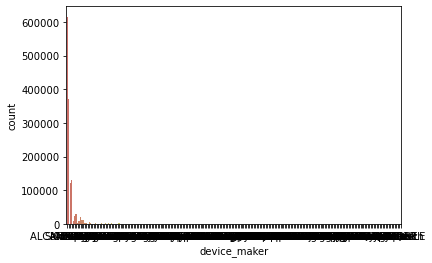

In [16]:
import seaborn as sns
sns.countplot(x='device_maker', data=train, palette='hls')

<AxesSubplot:xlabel='device_model', ylabel='count'>

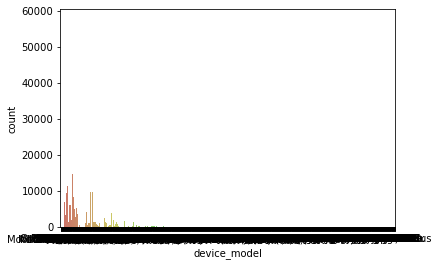

In [17]:
sns.countplot(x='device_model', data=train, palette='hls')

<p style="line-height:1.75;font-size:16px">
We can see there are many minor values apears only once or couple of times.<br>
'Samsung' is most common value by far (after na value). Before we fill all NA with value as 'Samsung', lets check how many options exist:

In [18]:
pd.unique(train.device_maker)

array([nan, 'Samsung', 'LG', 'ZTE', 'Motorola', 'Coolpad', 'HTC',
       'ALCATEL', 'Sony', 'Huawei', 'Google', 'T-Mobile',
       'ALCATEL ONE TOUCH', 'OZing', 'RCA', 'Razer', 'Asus', 'Kakatech',
       'Unimax', 'Hyundai', 'ANS', 'Lenovo', 'verykool', 'Xiaomi', 'BLU',
       'Azumi', 'LiteTEL', 'Kyocera', 'Infinix', 'Verizon', 'Sheffield',
       'Cricket', 'Nubia', 'Insignia', 'Vortex', 'FiGO', 'Oneplus',
       'Vivo', 'Hisense', 'Simbans', 'Essential', 'BlackBerry', 'LANIX',
       'Smartab', 'Nextbit', 'General Mobile', 'HMD Global', 'MygPad',
       'Barnes and Noble', 'CUBOT', 'NuVision', 'Unnecto', 'Unihertz',
       'DoCoMo', 'OPPO', 'nabi', 'Exmobile', 'Ergo', 'Tecno',
       'NUU Mobile', 'DigiLand', 'NextBook', 'Advan', 'Citycall', 'LeTV',
       'Ematic', 'IVIEW', 'Proscan', 'TCL', 'Sky', 'Amazon', 'DOOGEE',
       'Acer', 'M4Tel', 'Ulefone', 'Ipro', 'Blackview', 'KODAK',
       'Bmobile', 'Casper', 'Vizio', 'Cherry Mobile', 'Sprint', 'NeuTab',
       'Azpen', 'Supersonic

<p style="line-height:1.75;font-size:16px">
Since there are many values, and most of device_maker and device_model values is NaN, Specify the NaN values as 'Samsung' will be wrong.<br>
Lets see how many 'device_maker' single values:

In [19]:
train.device_maker.value_counts().value_counts()

1        51
2        20
3        15
6        10
7         8
         ..
355       1
10086     1
106       1
1132      1
112       1
Name: device_maker, Length: 87, dtype: int64

<p style="line-height:1.75;font-size:16px">
There are 51 single values, 20 duplicate value and go on.<br>
Lets try to union some values as type 'other' to simplify the data.
If we will union the values apears under 40 times we get 1331 items in category 'other'

In [20]:
train.device_maker.value_counts().loc[lambda x: x < 40].sum()

1301

<p style="line-height:1.75;font-size:16px">
Increasing these thresholds to 6000 (because union 1332 device_makers out of 2 milion lines is too little):

In [21]:
train.device_maker.value_counts().loc[lambda x: x < 6000].sum()

34399

<p style="line-height:1.75;font-size:16px">
Before we drop those columns, we can renamed all those little values as 'other':

In [22]:
train.device_maker.value_counts().loc[lambda x: x < 60000]

ALCATEL              30740
HTC                  22790
Google               19899
T-Mobile             11781
ALCATEL ONE TOUCH    10086
                     ...  
QUBE ELECTRONICS         1
Qnet Mobile              1
GOMOBILE                 1
Prime                    1
SOLONE                   1
Name: device_maker, Length: 222, dtype: int64

In [23]:
from sklearn.impute import SimpleImputer
import numpy as np

imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='other')
train['device_maker'] = imp.fit_transform(train['device_maker'].values.reshape(-1,1))

<ipython-input-23-9be5e9b3e06e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['device_maker'] = imp.fit_transform(train['device_maker'].values.reshape(-1,1))


<AxesSubplot:xlabel='device_maker', ylabel='count'>

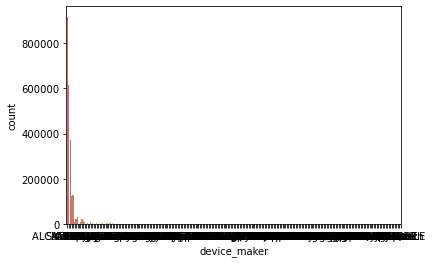

In [24]:
sns.countplot(x='device_maker', data=train, palette='hls')

<p style="line-height:1.75;font-size:16px">
As we can see, NaN value now revalued as 'other' and nothing changed. <br>
Lets revalue all minor values to 'other':

In [25]:
train['device_maker'].loc[train['device_maker'].value_counts()[train['device_maker']].values < 6000] = 'other'

C:\Users\main_user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-25-a8882049da42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['device_maker'].loc[train['device_maker'].value_counts()[train['device_maker']].values < 6000] = 'other'


In [26]:
pd.unique(train.device_maker)

array(['other', 'Samsung', 'LG', 'ZTE', 'Motorola', 'Coolpad', 'HTC',
       'ALCATEL', 'Huawei', 'Google', 'T-Mobile', 'ALCATEL ONE TOUCH',
       'Asus'], dtype=object)

<AxesSubplot:xlabel='device_maker', ylabel='count'>

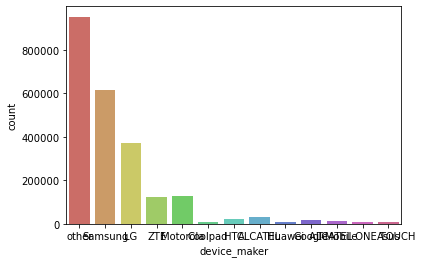

In [27]:
sns.countplot(x='device_maker', data=train, palette='hls')

<p style="line-height:1.75;font-size:16px">
Lets to it for all values below 60000 apears:

In [28]:
train['device_maker'].loc[train['device_maker'].value_counts()[train['device_maker']].values < 60000] = 'other'

C:\Users\main_user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-28-42aa3fba5837>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['device_maker'].loc[train['device_maker'].value_counts()[train['device_maker']].values < 60000] = 'other'


In [29]:
pd.unique(train.device_maker)

array(['other', 'Samsung', 'LG', 'ZTE', 'Motorola'], dtype=object)

<AxesSubplot:xlabel='device_maker', ylabel='count'>

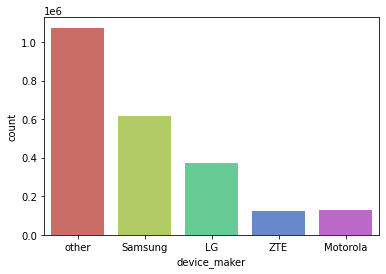

In [30]:
sns.countplot(x='device_maker', data=train, palette='hls')

<p style="line-height:1.75;font-size:16px">
'device_model' feature most values is 'NaN' so it seems we can drop this column:

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2310242 entries, 0 to 3148818
Data columns (total 13 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   bidid          object
 1   utc_time       int64 
 2   app_id         object
 3   user_state     object
 4   user_isp       object
 5   device_maker   object
 6   device_model   object
 7   device_osv     object
 8   device_height  int64 
 9   device_width   int64 
 10  click          int64 
 11  time_zone      object
 12  local_time     object
dtypes: int64(4), object(9)
memory usage: 246.8+ MB


<p style="line-height:1.75;font-size:16px">
Now we can drop the 'bidid' column since Index is also unique.<br>
Also we can reorder the columns 'device_height' and 'device_width' as one column named 'device_size'.<br>
We can drop the 'user_state', 'time_zone' and 'utc_time' columns.<br>
We can drop 'device_model' column, most of the values are NaN.

In [32]:
train['device_size'] = train['device_height'] * train['device_width']
train.drop(['bidid', 'device_height', 'device_width', 'user_state', 'time_zone', 'utc_time', 'device_model'], axis=1, inplace=True)
train.sample(4)

<ipython-input-32-6e175e4f2f8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['device_size'] = train['device_height'] * train['device_width']
C:\Users\main_user\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,app_id,user_isp,device_maker,device_osv,click,local_time,device_size
3114357,com.vog.ModernWorldWar.UsArmy.Survival,Sprint PCS,LG,7.1.2,0,2018-10-06 13:26:59.561000-04:00,921600
310222,com.mobilityware.CrownSolitaire,Verizon Wireless,other,7.0,0,2018-09-11 16:09:54.372000-05:00,3686400
55312,com.boombitgames.DrivingSchoolParking,Sprint PCS,Samsung,7.0,0,2018-09-25 18:15:00.653000-04:00,1498176
1689954,com.honikougames.dailykitten,Comcast Cable,LG,7.0,0,2018-09-12 13:29:17.983000-04:00,921600


<p style="line-height:1.75;font-size:16px">
Lets look a bit on column named 'user_isp':

In [33]:
print(train.user_isp.value_counts(dropna=False))

T-Mobile USA             511287
Spectrum                 281506
Comcast Cable            247726
AT&T Wireless            239507
Verizon Wireless         215441
                          ...  
Sonepar Management US         1
PureVPN                       1
State Of Delaware             1
Gilbarco                      1
GS Computer Services          1
Name: user_isp, Length: 3311, dtype: int64


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2310242 entries, 0 to 3148818
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   app_id        object
 1   user_isp      object
 2   device_maker  object
 3   device_osv    object
 4   click         int64 
 5   local_time    object
 6   device_size   int64 
dtypes: int64(2), object(5)
memory usage: 141.0+ MB


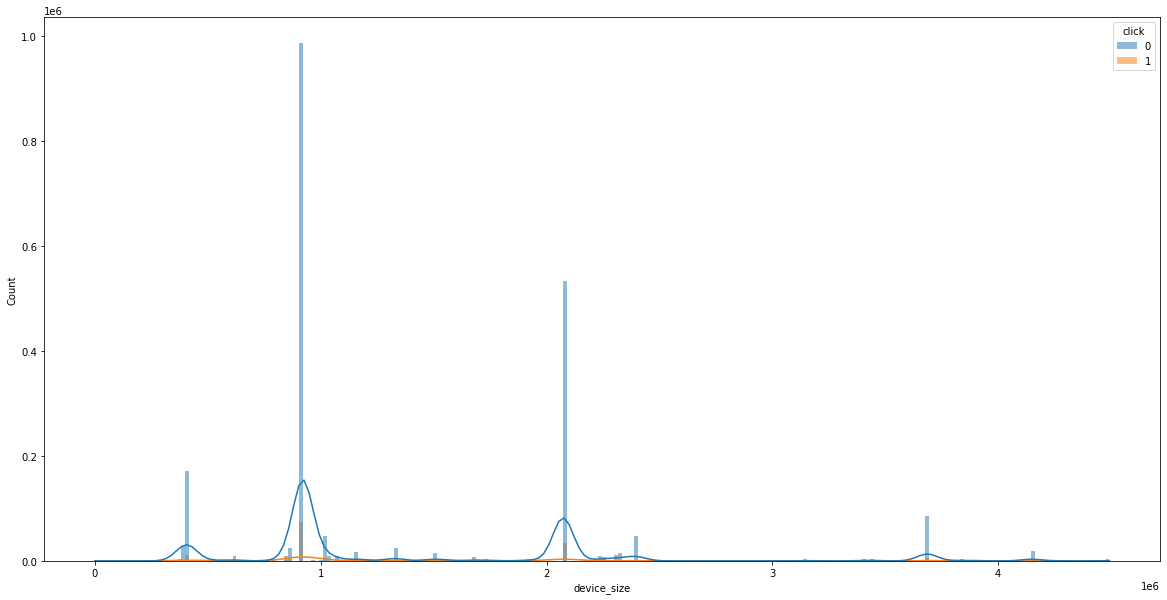

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(data=train, x='device_size', hue='click', stat='count', edgecolor=None, kde=True)
plt.show()

In [36]:
train['device_size_bigger_1.5'] = train['device_size'].apply(lambda size : 1 if size > 1.5 else 0)
train.drop(['device_size'], axis=1, inplace=True)

<ipython-input-36-96e7138a25ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['device_size_bigger_1.5'] = train['device_size'].apply(lambda size : 1 if size > 1.5 else 0)
C:\Users\main_user\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [37]:
train.head()

,app_id,user_isp,device_maker,device_osv,click,local_time,device_size_bigger_1.5
0,com.OppanaGames.CarSim,AT&T Wireless,other,7.0,0,2018-09-08 17:05:31.894000-05:00,1
1,com.mobilityware.CrownSolitaire,T-Mobile USA,other,7.0,0,2018-09-08 17:06:03.932000-05:00,1
2,com.kuttigames.tenkyurollball,AT&T Wireless,other,7.1.1,0,2018-09-08 17:06:26.908000-05:00,1
3,com.trendactionfree.call_of_sniper_duty_frontl...,Comcast Cable,other,6.0.1,0,2018-09-08 17:06:45.023000-05:00,1
4,com.landslab.my3rdgrademathgames,AT&T U-verse,other,7.1.1,0,2018-09-08 18:07:23.458000-04:00,1


<p style="line-height:1.75;font-size:16px">
Lets plot if data is imbalanced (we already know it is):

<AxesSubplot:xlabel='click', ylabel='count'>

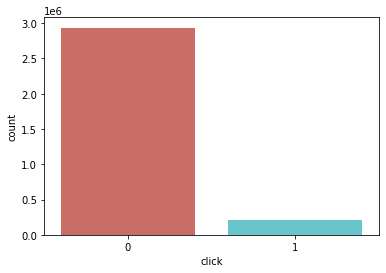

In [38]:
sns.countplot(x='click', data=data, palette='hls')

<p style="line-height:1.75;font-size:16px">
Pull up applications data from zip files:

learn the zip api:

In [39]:
from zipfile import ZipFile
import pickle

app_details = ZipFile("data/play_apps.zip")
app_file = 'play_apps/a008.com.fc2.blog.androidkaihatu.datecamera2'
app = pickle.loads(app_details.read(app_file))
app['app_id'], app['category'], app['score']

('a008.com.fc2.blog.androidkaihatu.datecamera2', ['PHOTOGRAPHY'], '4.0')

In [40]:
apps = train['app_id'].unique().tolist()
len(apps)

12910

Trying to apply the app values for each row in train data but it takes too long:

In [41]:
'''
### THIS IS TAKING TOO LONG ###
columns = ['app_id','category','score','reviews','editors_choice','free']

count = 0
for index, row in train.iterrows():
    try:
        app = pickle.loads(app_details.read('play_apps/' + row['app_id']))
        if row['app_id'] != app['app_id']:
            continue
        else:
            for c in columns:
                row[c] = app[c]
            # if there is more than one category, leave one only
            row['category'] = row['category'][0]
            count += 1
    except:
        for c in columns:
                row[c] = None

print(count)
train
'''

"\n### THIS IS TAKING TOO LONG ###\ncolumns = ['app_id','category','score','reviews','editors_choice','free']\n\ncount = 0\nfor index, row in train.iterrows():\n    try:\n        app = pickle.loads(app_details.read('play_apps/' + row['app_id']))\n        if row['app_id'] != app['app_id']:\n            continue\n        else:\n            for c in columns:\n                row[c] = app[c]\n            # if there is more than one category, leave one only\n            row['category'] = row['category'][0]\n            count += 1\n    except:\n        for c in columns:\n                row[c] = None\n\nprint(count)\ntrain\n"

In [42]:
columns = ['app_id','category','score','reviews','editors_choice','free']

In [43]:
def get_app_data(app_name):
    row = {}
    try:
        app = pickle.loads(app_details.read('play_apps/' + app_name))
        for c in columns:
            row[c] = app[c]
        # if there is more than one category, leave one only
        row['category'] = row['category'][0]
    except:
        for c in columns:
                row[c] = 'None'
    return row

In [44]:
get_app_data('com.OppanaGames.CarSim')

{'app_id': 'com.OppanaGames.CarSim',
 'category': 'GAME_SIMULATION',
 'score': '4.3',
 'reviews': 155129,
 'editors_choice': False,
 'free': True}

In [45]:
apps_list = []
for app in apps:
    apps_list.append(get_app_data(app))

apps_list

[{'app_id': 'com.OppanaGames.CarSim',
  'category': 'GAME_SIMULATION',
  'score': '4.3',
  'reviews': 155129,
  'editors_choice': False,
  'free': True},
 {'app_id': 'com.mobilityware.CrownSolitaire',
  'category': 'GAME_CARD',
  'score': '4.7',
  'reviews': 11927,
  'editors_choice': False,
  'free': True},
 {'app_id': 'com.kuttigames.tenkyurollball',
  'category': 'GAME_ARCADE',
  'score': '4.1',
  'reviews': 178,
  'editors_choice': False,
  'free': True},
 {'app_id': 'None',
  'category': 'None',
  'score': 'None',
  'reviews': 'None',
  'editors_choice': 'None',
  'free': 'None'},
 {'app_id': 'com.landslab.my3rdgrademathgames',
  'category': 'GAME_EDUCATIONAL',
  'score': '3.6',
  'reviews': 35,
  'editors_choice': False,
  'free': True},
 {'app_id': 'com.kick.trucks.manual.shift.driving',
  'category': 'GAME_SIMULATION',
  'score': '3.6',
  'reviews': 3891,
  'editors_choice': False,
  'free': True},
 {'app_id': 'com.slots.realvegas2',
  'category': 'GAME_CASINO',
  'score': '4.7

In [46]:
apps_df = pd.DataFrame(apps_list)
apps_df

,app_id,category,score,reviews,editors_choice,free
0,com.OppanaGames.CarSim,GAME_SIMULATION,4.3,155129,False,True
1,com.mobilityware.CrownSolitaire,GAME_CARD,4.7,11927,False,True
2,com.kuttigames.tenkyurollball,GAME_ARCADE,4.1,178,False,True
3,None,None,None,None,None,None
4,com.landslab.my3rdgrademathgames,GAME_EDUCATIONAL,3.6,35,False,True
...,...,...,...,...,...,...
12905,None,None,None,None,None,None
12906,None,None,None,None,None,None
12907,None,None,None,None,None,None
12908,None,None,None,None,None,None


In [47]:
train.set_index('app_id',inplace=True)
apps_df.set_index('app_id',inplace=True)

train = train.join(apps_df)

In [48]:
train.reset_index(inplace=True)
train.head()

,app_id,user_isp,device_maker,device_osv,click,local_time,device_size_bigger_1.5,category,score,reviews,editors_choice,free
0,Ibtikar.Applications.Ibaloot,T-Mobile USA,Samsung,8.0.0,0,2018-10-14 12:02:11.214000-04:00,1,GAME_CARD,4.0,53660,False,True
1,Ibtikar.Applications.Ibaloot,Madgenius.com,Samsung,7.0,0,2018-09-20 08:01:05.440000-05:00,1,GAME_CARD,4.0,53660,False,True
2,Ibtikar.Applications.Ibaloot,AT&T Wireless,other,8.0.0,0,2018-08-17 01:13:32.953000-04:00,1,GAME_CARD,4.0,53660,False,True
3,Ibtikar.Applications.Ibaloot,EGIHosting,other,7.0,0,2018-08-28 12:45:35.421000-07:00,1,GAME_CARD,4.0,53660,False,True
4,abc.FeetlyDash,Optimum Online,other,7.1.1,0,2018-08-18 07:59:48.022000-04:00,1,NaN,NaN,NaN,NaN,NaN


In [49]:
train.isna().sum()

app_id                         0
user_isp                      32
device_maker                   0
device_osv                     0
click                          0
local_time                     0
device_size_bigger_1.5         0
category                  181588
score                     185915
reviews                   181588
editors_choice            181588
free                      181588
dtype: int64

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310242 entries, 0 to 2310241
Data columns (total 12 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   app_id                  object
 1   user_isp                object
 2   device_maker            object
 3   device_osv              object
 4   click                   int64 
 5   local_time              object
 6   device_size_bigger_1.5  int64 
 7   category                object
 8   score                   object
 9   reviews                 object
 10  editors_choice          object
 11  free                    object
dtypes: int64(2), object(10)
memory usage: 211.5+ MB


In [51]:
train.drop(['user_isp'], axis=1, inplace=True)

train.category.fillna('other', inplace=True)

train.score.fillna(0, inplace=True)
train.score = train.score.astype(float)

train.reviews.fillna(0, inplace=True)
train.reviews = train.reviews.astype(float)

train.editors_choice.fillna(False, inplace=True)
train.editors_choice = train.editors_choice.astype(int)

train.free.fillna(False, inplace=True)
train.free = train.free.astype(int)

In [52]:
train.isna().sum()

app_id                    0
device_maker              0
device_osv                0
click                     0
local_time                0
device_size_bigger_1.5    0
category                  0
score                     0
reviews                   0
editors_choice            0
free                      0
dtype: int64

In [53]:
train['month'] = train.apply(lambda row: row.local_time.month, axis = 1)
train['hour'] = train.apply(lambda row: row.local_time.hour, axis = 1)
train['weekday'] = train.apply(lambda row: row.local_time.strftime('%w'), axis = 1)

train.drop(['local_time'], axis=1, inplace=True)

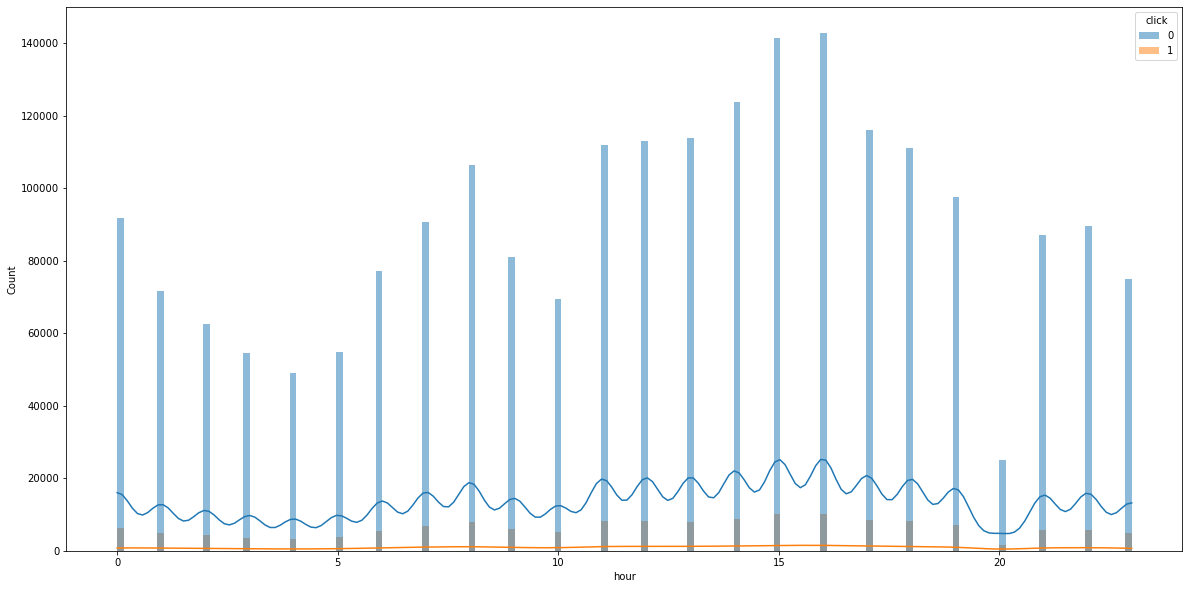

In [54]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(data=train, x='hour', hue='click', stat='count', edgecolor=None, kde=True)
plt.show()

In [55]:
[train[train.click == 1].click.value_counts().values[0], train[train.click == 0].click.value_counts().values[0]]

[152859, 2157383]

<AxesSubplot:>

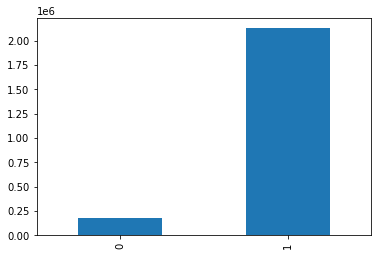

In [56]:
train.free.value_counts().sort_values().plot(kind = 'bar')

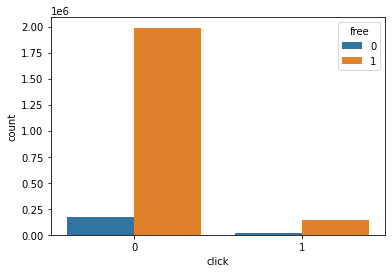

In [57]:
sns.countplot(x ='click', hue = "free", data = train)
 
# Show the plot
plt.show()

In [58]:
train.category.value_counts(dropna=False)

GAME_CARD              338591
GAME_PUZZLE            277074
GAME_ARCADE            223140
GAME_CASINO            223012
GAME_ACTION            202898
other                  181588
GAME_SIMULATION        162377
GAME_CASUAL            147799
GAME_BOARD             112802
GAME_WORD               82803
GAME_RACING             82463
GAME_ROLE_PLAYING       48594
GAME_ADVENTURE          46866
GAME_SPORTS             43539
GAME_EDUCATIONAL        31250
ENTERTAINMENT           26038
PERSONALIZATION         15213
GAME_STRATEGY           14850
EDUCATION               14494
GAME_TRIVIA              5462
MUSIC_AND_AUDIO          4003
TOOLS                    3346
PRODUCTIVITY             3216
LIBRARIES_AND_DEMO       3135
SOCIAL                   3054
GAME_MUSIC               2795
COMICS                   1711
AUTO_AND_VEHICLES        1682
PHOTOGRAPHY              1196
SPORTS                   1060
LIFESTYLE                 665
BOOKS_AND_REFERENCE       522
BEAUTY                    521
ART_AND_DE

In [59]:
train['category'].loc[train['category'].value_counts()[train['category']].values < 2000] = 'other'

C:\Users\main_user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [60]:
train.category.value_counts(dropna=False)

GAME_CARD             338591
GAME_PUZZLE           277074
GAME_ARCADE           223140
GAME_CASINO           223012
GAME_ACTION           202898
other                 191428
GAME_SIMULATION       162377
GAME_CASUAL           147799
GAME_BOARD            112802
GAME_WORD              82803
GAME_RACING            82463
GAME_ROLE_PLAYING      48594
GAME_ADVENTURE         46866
GAME_SPORTS            43539
GAME_EDUCATIONAL       31250
ENTERTAINMENT          26038
PERSONALIZATION        15213
GAME_STRATEGY          14850
EDUCATION              14494
GAME_TRIVIA             5462
MUSIC_AND_AUDIO         4003
TOOLS                   3346
PRODUCTIVITY            3216
LIBRARIES_AND_DEMO      3135
SOCIAL                  3054
GAME_MUSIC              2795
Name: category, dtype: int64

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310242 entries, 0 to 2310241
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   app_id                  object 
 1   device_maker            object 
 2   device_osv              object 
 3   click                   int64  
 4   device_size_bigger_1.5  int64  
 5   category                object 
 6   score                   float64
 7   reviews                 float64
 8   editors_choice          int32  
 9   free                    int32  
 10  month                   int64  
 11  hour                    int64  
 12  weekday                 object 
dtypes: float64(2), int32(2), int64(4), object(5)
memory usage: 211.5+ MB


In [62]:
train.device_osv.value_counts(dropna=False)

7.0                            785138
8.0.0                          497994
6.0.1                          406220
7.1.1                          384544
7.1.2                          115154
8.1.0                           56332
6.0                             47234
9                               17536
7.1                                54
P                                  16
8.0                                 7
6.1                                 5
CONTIXO-LA703-20180915-v1.0         4
5.0 by mrkindaiji                   2
M                                   1
7.0.1                               1
Name: device_osv, dtype: int64

In [63]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train['device_osv'])
train['device_osv'] = le.transform(train['device_osv'])

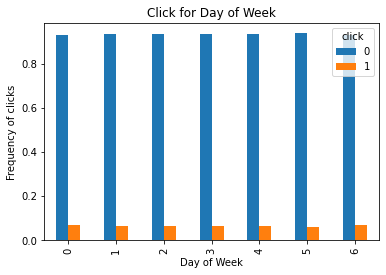

In [64]:
pd.crosstab(train.weekday, train.click).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar')
plt.title('Click for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of clicks')
plt.show()

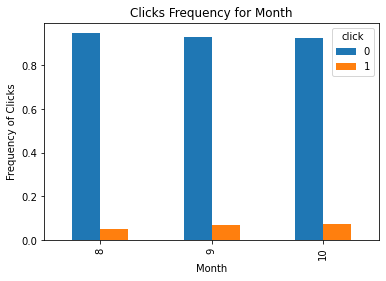

In [65]:
pd.crosstab(train.month, train.click).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar')
plt.title('Clicks Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Clicks')
plt.show()

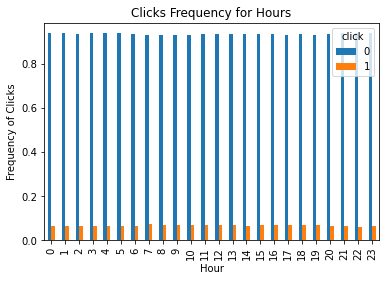

In [66]:
pd.crosstab(train.hour, train.click).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar')
plt.title('Clicks Frequency for Hours')
plt.xlabel('Hour')
plt.ylabel('Frequency of Clicks')
plt.show()

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310242 entries, 0 to 2310241
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   app_id                  object 
 1   device_maker            object 
 2   device_osv              int32  
 3   click                   int64  
 4   device_size_bigger_1.5  int64  
 5   category                object 
 6   score                   float64
 7   reviews                 float64
 8   editors_choice          int32  
 9   free                    int32  
 10  month                   int64  
 11  hour                    int64  
 12  weekday                 object 
dtypes: float64(2), int32(3), int64(4), object(4)
memory usage: 202.7+ MB


In [68]:
train.drop(['app_id', 'month', 'hour', 'weekday'], axis=1, inplace=True)

In [69]:
from sklearn.preprocessing import RobustScaler
 
scaler = RobustScaler()
cols = ['reviews', 'score']
train[cols] = scaler.fit_transform(train[cols])

In [70]:
cat_vars = ['device_maker', 'category']
train = pd.concat([train.drop(cat_vars, axis=1), pd.get_dummies(train[cat_vars])], axis=1)

In [71]:
X_train = train.drop('click', axis=1)
y_train = train['click']

In [84]:
columns = ['app_id','category','score','reviews','editors_choice','free']

apps = test['app_id'].unique().tolist()
apps_list = []
for app in apps:
    apps_list.append(get_app_data(app))
apps_df = pd.DataFrame(apps_list)

test.set_index('app_id',inplace=True)
apps_df.set_index('app_id',inplace=True)

apps_df

,category,score,reviews,editors_choice,free
app_id,,,,,
com.free.solitaire.games,GAME_CARD,4.4,3762,False,True
com.greenlightgames.deul,GAME_ACTION,4.1,47089,False,True
com.jaboston.catgames,GAME_ARCADE,3.0,5742,False,True
com.oxothuk.worldpuzzle,GAME_PUZZLE,4.0,90005,False,True
macrostudios.truthordare,GAME_CASUAL,4.2,45499,False,True
...,...,...,...,...,...
com.tgg.littleshoedesignerfashionworld,GAME_ROLE_PLAYING,4.2,8874,False,True
None,None,None,None,None,None
None,None,None,None,None,None


In [85]:
# device_maker
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='other')
test['device_maker'] = imp.fit_transform(test['device_maker'].values.reshape(-1,1))
test['device_maker'].loc[test['device_maker'].value_counts()[test['device_maker']].values < 60000] = 'other'

# device_size
test['device_size'] = test['device_height'] * test['device_width']
test['device_size_bigger_1.5'] = test['device_size'].apply(lambda size : 1 if size > 1.5 else 0)

# add data from zip files
test = test.join(apps_df)
test.reset_index(inplace=True)

<ipython-input-85-54ad98c7c1fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['device_maker'] = imp.fit_transform(test['device_maker'].values.reshape(-1,1))
C:\Users\main_user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-85-54ad98c7c1fe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [86]:
# category
test.category.fillna('other', inplace=True)
test['category'].loc[test['category'].value_counts()[test['category']].values < 2000] = 'other'

# editor_choice
test.editors_choice.fillna(False, inplace=True)
test.editors_choice = test.editors_choice.astype(int)

# free
test.free.fillna(False, inplace=True)
test.free = test.free.astype(int)

# device_osv encoding
le = LabelEncoder()
le.fit(test['device_osv'])
test['device_osv'] = le.transform(test['device_osv'])

test

,app_id,bidid,utc_time,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,click,time_zone,local_time,device_size,device_size_bigger_1.5,category,score,reviews,editors_choice,free
0,abc.kids.preschool.learning.phonics.songs.videos,46637dbe-22c0-4a9e-a858-9eb355dd773e,1541356997801,MS,CSpire Wireless,LG,AS998,6,1440,2880,1,America/Chicago,2018-11-04 12:43:17.801000-06:00,4147200,1,EDUCATION,4.4,1371,0,1
1,abc.kids.preschool.learning.phonics.songs.videos,46637dbe-22c0-4a9e-a858-9eb355dd773e,1541356824978,MS,CSpire Wireless,LG,AS998,6,1440,2880,0,America/Chicago,2018-11-04 12:40:24.978000-06:00,4147200,1,EDUCATION,4.4,1371,0,1
2,abc.kids.preschool.learning.phonics.songs.videos,5dcbd3cf-4e75-425e-b1d7-6f8c77779d33,1542248281587,TX,T-Mobile USA,other,A574BL,5,480,854,0,America/Chicago,2018-11-14 20:18:01.587000-06:00,409920,1,EDUCATION,4.4,1371,0,1
3,abc.kids.preschool.learning.phonics.songs.videos,f372410c-3679-4735-8937-cdfcb8439e26,1542258853122,IL,Sprint PCS,Samsung,SM-J727P,3,720,1280,0,America/Chicago,2018-11-14 23:14:13.122000-06:00,921600,1,EDUCATION,4.4,1371,0,1
4,abc.kids.preschool.learning.phonics.songs.videos,5d3e5037-1f9c-4164-98ad-255990304e7c,1541696587641,IL,AT&T Wireless,LG,LM-X210(G),6,1280,720,0,America/Chicago,2018-11-08 11:03:07.641000-06:00,921600,1,EDUCATION,4.4,1371,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838581,zaycev.fm,49c987ef-3521-40a8-baa2-51057ba7b6aa,1541457484811,MN,T-Mobile USA,LG,H901,3,2560,1440,0,America/Chicago,2018-11-05 16:38:04.811000-06:00,3686400,1,MUSIC_AND_AUDIO,4.5,21618,0,1
838582,zaycev.fm,79daab48-5d41-46e6-ad63-e6ddaa9f05c0,1542204652158,NY,Sprint PCS,Samsung,SM-G935P,8,1920,1080,0,America/New_York,2018-11-14 09:10:52.158000-05:00,2073600,1,MUSIC_AND_AUDIO,4.5,21618,0,1
838583,zaycev.fm,ed871024-69af-4cc4-a94e-64ff1a929513,1540297882076,TX,Spectrum,other,Pixel XL,11,2560,1440,0,America/Chicago,2018-10-23 07:31:22.076000-05:00,3686400,1,MUSIC_AND_AUDIO,4.5,21618,0,1
838584,zebi24.guess_5,3b9565c0-96f3-4d6d-8975-32b3667eeea1,1541096622211,MD,Verizon Wireless,LG,L84VL,6,1280,720,0,America/New_York,2018-11-01 14:23:42.211000-04:00,921600,1,other,4.1,969,0,1


In [87]:
# score
test.score.fillna(0, inplace=True)
test.score = test.score.astype(float)

# reviews
test.reviews.fillna(0, inplace=True)
test.reviews = test.reviews.astype(float)

# scaling
cols = ['reviews', 'score']
test[cols] = scaler.fit_transform(test[cols])

# get_dummies
cat_vars = ['device_maker', 'category']
test = pd.concat([test.drop(cat_vars, axis=1), pd.get_dummies(test[cat_vars])], axis=1)

In [90]:
test.drop(['device_size', 'bidid', 'device_height', 'device_width', 'user_state', 'time_zone', 'utc_time', 'device_model','user_isp','local_time','app_id'], axis=1, inplace=True)

In [91]:
X_test = test.drop('click', axis=1)
y_test = test['click']

In [92]:
X_train

,device_osv,device_size_bigger_1.5,score,reviews,editors_choice,free,device_maker_LG,device_maker_Motorola,device_maker_Samsung,device_maker_ZTE,...,category_GAME_STRATEGY,category_GAME_TRIVIA,category_GAME_WORD,category_LIBRARIES_AND_DEMO,category_MUSIC_AND_AUDIO,category_PERSONALIZATION,category_PRODUCTIVITY,category_SOCIAL,category_TOOLS,category_other
0,10,1,-1.00,0.179992,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,4,1,-1.00,0.179992,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,10,1,-1.00,0.179992,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,-1.00,0.179992,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,1,-11.00,-0.187960,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2310237,7,1,-11.00,-0.187960,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2310238,4,1,-11.00,-0.187960,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2310239,4,1,-11.00,-0.187960,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2310240,7,1,-11.00,-0.187960,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [93]:
X_test

,device_osv,device_size_bigger_1.5,score,reviews,editors_choice,free,device_maker_LG,device_maker_Motorola,device_maker_Samsung,device_maker_ZTE,...,category_GAME_PUZZLE,category_GAME_RACING,category_GAME_ROLE_PLAYING,category_GAME_SIMULATION,category_GAME_SPORTS,category_GAME_STRATEGY,category_GAME_WORD,category_LIBRARIES_AND_DEMO,category_MUSIC_AND_AUDIO,category_other
0,6,1,0.166667,-0.165482,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,1,0.166667,-0.165482,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,1,0.166667,-0.165482,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0.166667,-0.165482,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,6,1,0.166667,-0.165482,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838581,3,1,0.333333,0.339645,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
838582,8,1,0.333333,0.339645,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
838583,11,1,0.333333,0.339645,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
838584,6,1,-0.333333,-0.175511,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [94]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report

def show_classifier_results(clf,X_columns):
    y_pred = clf.predict(X_columns)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(f'Presision score: {precision_score(y_test, y_pred)}')
    print(f'Recall score: {recall_score(y_test, y_pred)}')

In [95]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [96]:
show_classifier_results(lr, X_test)

ValueError: X has 32 features per sample; expecting 37

In [ ]:
'''for estimator in [LogisticRegression, DecisionTreeClassifier]:
    for n in [10, 100, 200]:
        for lr in [0.01, 0.1, 1, 10]:
            clf = AdaBoostClassifier(base_estimator=estimator(), n_estimators=n, learning_rate=lr)
            clf.fit(X_train, y_train)
            print(f'Estimator: {estimator.__name__}, Number: {n}, Learning Rate: {lr}')
            print(f'Train: {clf.score(X_train, y_train)}')
            print(f'Test: {clf.score(X_test, y_test)}\n')'''

In [ ]:
!aws s3 cp /home/ubuntu/notebooks/intro_to_ml/day_6/"Final Project-yhenig".ipynb s3://uatt-e2-yhenig/intro_to_ml/project1